In [1]:
import tensorflow as tf

train_x = []
batch_size = 7
hm_epochs = 3

In [2]:
import pickle
import numpy as np
d = {}
with open('GrayTrainY.pkl', 'rb') as file:
    d = pickle.load(file)

for key in d:
    train_x.append(np.array(d[key]).reshape(250 * 250))

In [3]:
x = tf.placeholder(tf.float32, [None, 250 * 250]) # try getting the same image
y = tf.placeholder(tf.float32, [None, 250 * 250])

In [4]:
def cnn_model(x):
    
    x = tf.reshape(x, shape=[-1, 250, 250, 1])
    
    conv1 = tf.layers.conv2d(
                            inputs=x,
                            filters=32,
                            kernel_size=[25, 25],
                            padding="same",
                            activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[5, 5], strides=5)
    print(pool1.shape)
    
    conv2 = tf.layers.conv2d(
                            inputs=pool1,
                            filters=64,
                            kernel_size=[25, 25],
                            padding="same",
                            activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[5, 5], strides=5)
    print(pool2.shape)
    
    conv3 = tf.layers.conv2d(
                            inputs=pool2,
                            filters=128,
                            kernel_size=[5, 5],
                            padding="same",
                            activation=tf.nn.relu)
    
    conv4 = tf.layers.conv2d_transpose(
                                      inputs=conv3,
                                      filters=64,
                                      kernel_size=[5, 5],
                                      padding="same")
    print(conv4.shape)
    
    conv5 = tf.layers.conv2d_transpose(
                                      inputs=conv4,
                                      filters=32,
                                      kernel_size=[25, 25],
                                      padding="same")
    print(conv5.shape)
    
    conv6 = tf.layers.conv2d_transpose(
                                      inputs=conv5,
                                      filters=625,
                                      kernel_size=[25, 25],
                                      padding="same")
    print(conv6.shape)
    
    output = tf.nn.softmax(conv6)
    
    return tf.reshape(output, (-1 , 250 * 250))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def train_neural_network(x):
    prediction = cnn_model(x)
    cost = tf.reduce_mean(tf.losses.mean_squared_error(y, prediction))

    # default learning rate = 0.001
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # now we are done initializing our computation graph

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for i in range(int(len(train_x)//batch_size)):
                epoch_x = train_x[batch_size * i: batch_size * i + batch_size]
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_x})
                prediction_0 = prediction.eval(feed_dict={x: epoch_x[0].reshape(-1, 250*250)})
                print(epoch_x[0])
                plt.imshow(epoch_x[0].reshape(250, 250), cmap='gray')
                plt.show()
                plt.imshow(prediction_0.reshape(250, 250), cmap='gray')
                print(prediction_0)
                plt.show()

(?, 50, 50, 32)
(?, 10, 10, 64)
(?, 10, 10, 64)
(?, 10, 10, 32)
(?, 10, 10, 625)
[0 0 0 ..., 0 0 0]


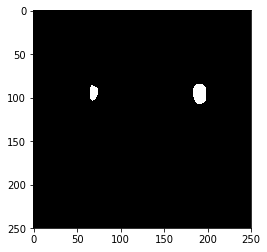

[[ 0.00159748  0.00159714  0.00159937 ...,  0.00160037  0.0015961
   0.00159742]]


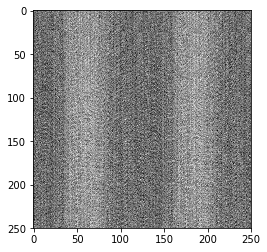

[0 0 0 ..., 0 0 0]


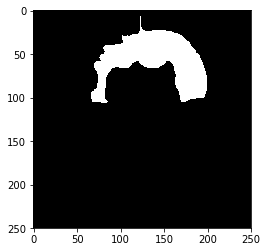

[[ 0.00159513  0.00159315  0.00159877 ...,  0.00160083  0.00159142
   0.00159634]]


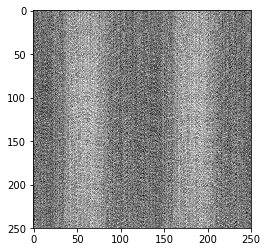

KeyboardInterrupt: 

In [6]:
train_neural_network(x)